In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.stats.proportion as ssp
plt.style.use('rossidata')

/Users/nicholasrossi/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


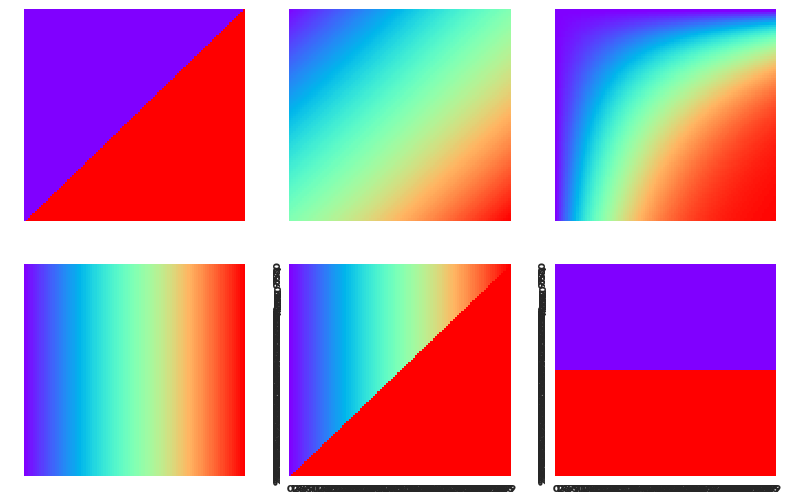

In [379]:
plt.subplots()
fig,ax=plt.subplots(2,3,figsize=(12,8))
tracefig,traceax=plt.subplots()
def information_calculator(px):
    vals=1-(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=1
    return vals
def entropy_calculator(px):
    vals=(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=0
    return vals

#number of fluorophore splits
n_splits=10
column_num=10

grid=np.zeros((n_splits,column_num-1))

vals=np.linspace(0,1.0,column_num-1)
vals=np.append(vals,vals[::-1])

grid=np.zeros((n_splits,len(vals)))

#grid[5:,5:]=.2*np.multiply(np.arange(13),np.ones(np.shape(grid[5:,5:])))
zize=100
grid=1-np.hstack((np.tril(np.ones(zize)),np.zeros((zize,1))))



sns.heatmap(np.flipud(grid)*100,ax=ax[0,0],cmap="rainbow",vmin=0, vmax=100,cbar=False)
ax[0,0].axis('off')
# 
information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
traceax.plot(information_time,label='old')

grid=np.ones((zize))

# grid=1-np.tril(np.ones(zize))*np.linspace(0,1,zize)[::-1]

grid=np.ones((zize,zize))
for l in range(100):
    for k in range(100):
        grid[l,k]=.5*(l)/100+.5*(k)/100
grid=1-grid  
grid=np.fliplr(grid)


sns.heatmap(np.flipud(grid)*100,ax=ax[0,1],cmap="rainbow",vmin=0, vmax=100,cbar=False)
ax[0,1].axis('off')
traceax.set_ylim([0,1.1])

information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
traceax.plot(information_time)

for x in range(100):
    grid[:,x]=1-np.power(1-(x/100)*.644,np.arange(100)/20)
grid=np.flipud(grid)

sns.heatmap(np.flipud(grid)*100,ax=ax[0,2],cmap="rainbow",vmin=0, vmax=100,cbar=False)
information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
ax[0,2].axis('off')
traceax.plot(information_time)

grid=np.ones((zize,zize))
for x in range(100):
    grid[x,:]=np.linspace(0,1,100)
sns.heatmap(np.flipud(grid)*100,ax=ax[1,0],cmap="rainbow",vmin=0, vmax=100,cbar=False)
ax[1,0].axis('off')
information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
traceax.plot(information_time)

#grid=1-np.tril(np.ones(zize))*np.linspace(0,1,zize)[::-1]
grid=1-np.tril(np.ones(zize))*np.linspace(0,1,zize)[::-1]

sns.heatmap(np.flipud(grid)*100,ax=ax[1,1],cmap="rainbow",vmin=0, vmax=100,cbar=False)
information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
traceax.plot(information_time)

grid=np.ones((zize,zize))

grid[50:,:]=0
sns.heatmap(np.flipud(grid)*100,ax=ax[1,2],cmap="rainbow",vmin=0, vmax=100,cbar=False)
information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))
traceax.plot(information_time)
fig.savefig('figures/computational_heat.pdf')
fig

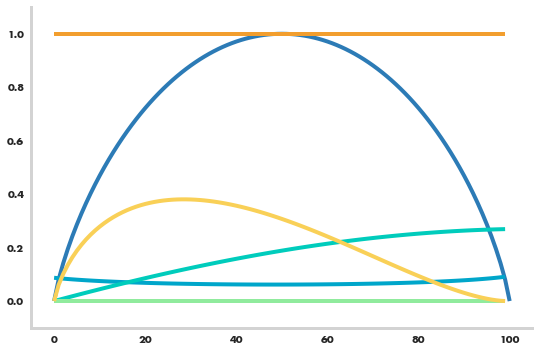

In [381]:
traceax.set_ylim([-0.1,1.1])
tracefig.savefig('figures/computational_trace.pdf')
tracefig

In [370]:
grid=1-np.tril(np.ones(zize))*np.linspace(0,1,zize)[::-1]

naught=np.ones((zize,zize))
for x in range(100):
    naught[x,:]=np.linspace(0,1,100)
grid=np.sqrt(grid)+10*naught 
grid=grid/np.max(grid)

In [374]:
grid

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [326]:
np.linspace(0,1,zize)[::-1]

array([ 1.        ,  0.98989899,  0.97979798,  0.96969697,  0.95959596,
        0.94949495,  0.93939394,  0.92929293,  0.91919192,  0.90909091,
        0.8989899 ,  0.88888889,  0.87878788,  0.86868687,  0.85858586,
        0.84848485,  0.83838384,  0.82828283,  0.81818182,  0.80808081,
        0.7979798 ,  0.78787879,  0.77777778,  0.76767677,  0.75757576,
        0.74747475,  0.73737374,  0.72727273,  0.71717172,  0.70707071,
        0.6969697 ,  0.68686869,  0.67676768,  0.66666667,  0.65656566,
        0.64646465,  0.63636364,  0.62626263,  0.61616162,  0.60606061,
        0.5959596 ,  0.58585859,  0.57575758,  0.56565657,  0.55555556,
        0.54545455,  0.53535354,  0.52525253,  0.51515152,  0.50505051,
        0.49494949,  0.48484848,  0.47474747,  0.46464646,  0.45454545,
        0.44444444,  0.43434343,  0.42424242,  0.41414141,  0.4040404 ,
        0.39393939,  0.38383838,  0.37373737,  0.36363636,  0.35353535,
        0.34343434,  0.33333333,  0.32323232,  0.31313131,  0.30